## Story Telling

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [64]:
df=pd.read_csv('starbucks-menu-nutrition-drinks.csv')
df.head()   

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  177 non-null    object
 1   Calories    177 non-null    object
 2   Fat (g)     177 non-null    object
 3   Carb. (g)   177 non-null    object
 4   Fiber (g)   177 non-null    object
 5   Protein     177 non-null    object
 6   Sodium      177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


## Remove the entries with missing values

In [66]:
df=df.replace('-',np.nan)
df=df.dropna()
df.columns=['drinks', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)','Protein', 'Sodium']
df

,drinks,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10
8,Evolution Fresh™ Organic Ginger Limeade,110,0,28,0,0,5
9,Iced Coffee,0,0,0,0,0,0
...,...,...,...,...,...,...,...
159,Mocha Light Frappuccino® Blended Coffee,140,0.5,28,1,4,180
168,Cinnamon Dolce Crème,200,6,28,0,10,135
171,Vanilla Crème,200,6,28,0,10,135
172,Chocolate Smoothie,320,5,53,8,20,170


There are 92 drinks with various concentration of the nutritions.

Data type conversion 

In [67]:
df['Calories']=df['Calories'].astype(float)
df['Fat (g)']=df['Fat (g)'].astype(float)
df['Carb. (g)']=df['Carb. (g)'].astype(float)
df['Fiber (g)']=df['Fiber (g)'].astype(float)
df['Protein']=df['Protein'].astype(float)
df['Sodium']=df['Sodium'].astype(float)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 173
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   drinks     92 non-null     object 
 1   Calories   92 non-null     float64
 2   Fat (g)    92 non-null     float64
 3   Carb. (g)  92 non-null     float64
 4   Fiber (g)  92 non-null     float64
 5   Protein    92 non-null     float64
 6   Sodium     92 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.8+ KB


Interrelationship between numeric features

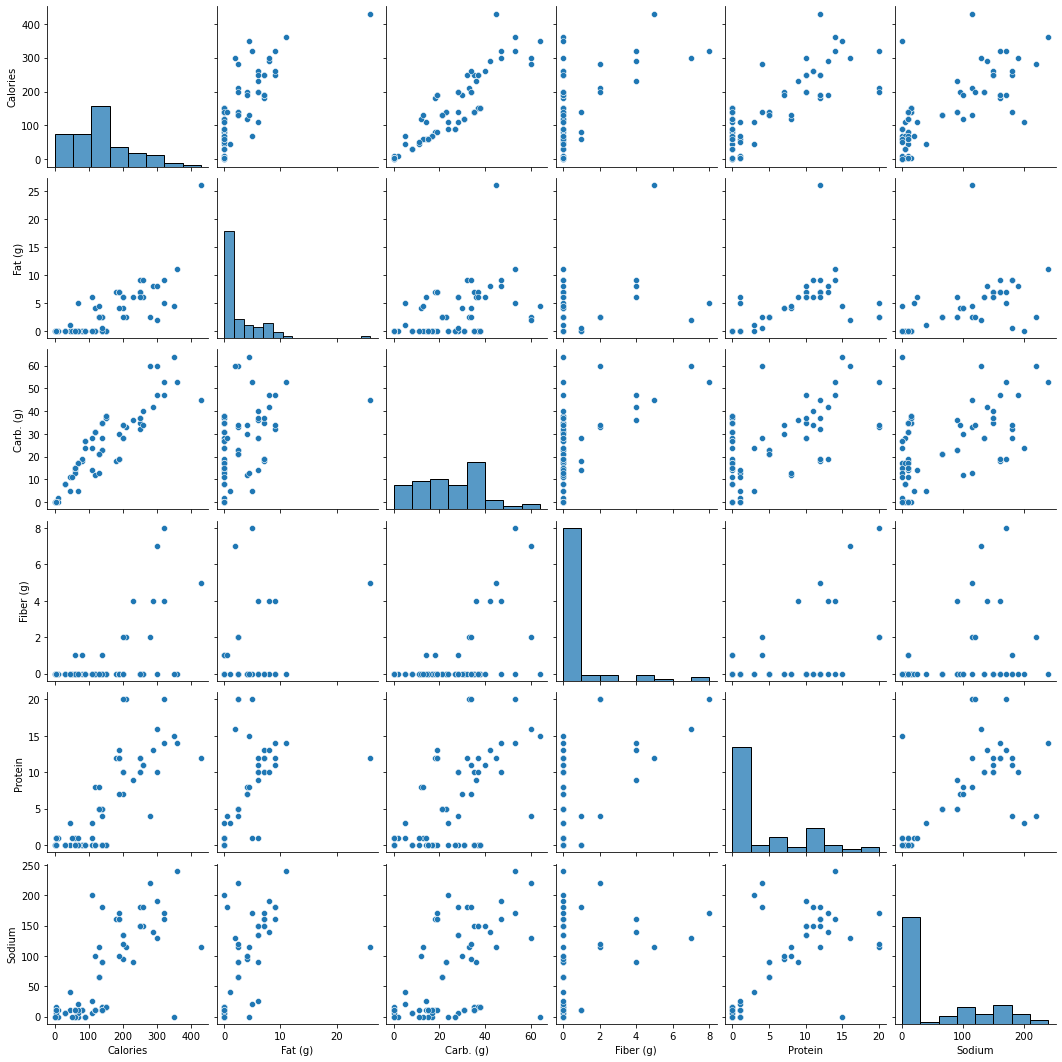

In [74]:
sns.pairplot(df)

**Calories and Carbohydrate are almost normally distributed, whereas, others are left_skewed.**
<br>
**Almost all the features are linearly correlated to each other.**

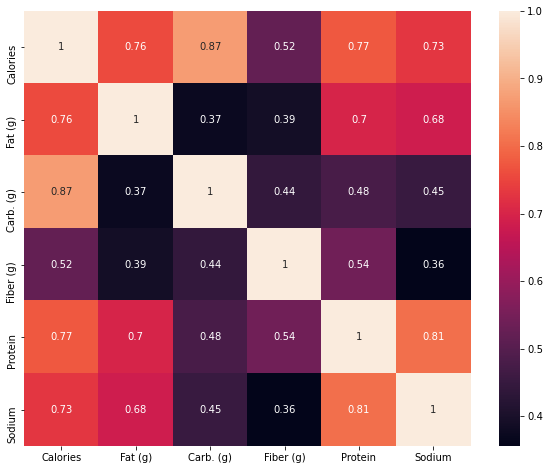

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

**As expected, Calories is highly correlated to carbohydrate and sodium is least correlated to Fiber and Carbohydrate.**

## top 5 drinks with corresponding higher nutrition content

Let's find 5 drinks which contains high amount of each nutrition. 

In [102]:
cal=df.sort_values('Calories', ascending=False).head()['drinks'].values
fat_g=df.sort_values('Fat (g)', ascending=False).head()['drinks'].values
carb_g=df.sort_values('Carb. (g)', ascending=False).head()['drinks'].values
fib=df.sort_values('Fiber (g)', ascending=False).head()['drinks'].values
prot=df.sort_values('Protein', ascending=False).head()['drinks'].values
sod=df.sort_values('Sodium', ascending=False).head()['drinks'].values

In [103]:
df1=pd.DataFrame(cal,columns=['calcium'])
df1['fat']=fat_g
df1['carb']=carb_g
df1['fiber']=fib
df1['protein']=prot
df1['sodium']=sod
df1

,calcium,fat,carb,fiber,protein,sodium
0,Starbucks® Signature Hot Chocolate,Starbucks® Signature Hot Chocolate,Cinnamon Dolce Frappuccino® Blended Coffee,Chocolate Smoothie,Chocolate Smoothie,White Chocolate Mocha
1,White Chocolate Mocha,White Chocolate Mocha,Strawberry Smoothie,Strawberry Smoothie,Starbucks® Doubleshot Protein Vanilla,Mocha Frappuccino® Blended Coffee
2,Cinnamon Dolce Frappuccino® Blended Coffee,Coconutmilk Mocha Macchiato,Mocha Frappuccino® Blended Coffee,Starbucks® Signature Hot Chocolate,Starbucks® Doubleshot Protein Dark Chocolate,Coffee Light Frappuccino® Blended Coffee
3,Chocolate Smoothie,Iced Coconutmilk Mocha Macchiato,Chocolate Smoothie,Hot Chocolate,Strawberry Smoothie,Iced White Chocolate Mocha
4,Hot Chocolate,Hot Chocolate,White Chocolate Mocha,Iced Caffè Mocha,Cinnamon Dolce Frappuccino® Blended Coffee,Iced Coconutmilk Mocha Macchiato


**Mostly Chocolate contains high amount of Calcium and fat; smoothie contains high amount of fiber and Mocha contains high amount of sodium.**

**Following questions emerged after this preliminary exploration of the data:
<br>
1) Can we predict one of the concentration of the nutrition based on all other remaining nutrition?
<br>
2) Can we group those drinks based on the concentration of the nutrition?**